In [38]:
import pandas as pd

data = pd.read_csv("sale.csv")

data.dropna(inplace = True)
print(data.to_string())

             Sales Person      Country               Product   Date  Amount  Boxes Shipped
0          Jehu Rudeforth           UK       Mint Chip Choco  44565    5320            180
1             Van Tuxwell        India         85% Dark Bars  44774    7896             94
2            Gigi Bohling        India   Peanut Butter Cubes  44749    4501             91
3            Jan Morforth    Australia   Peanut Butter Cubes  44678   12726            342
4          Jehu Rudeforth           UK   Peanut Butter Cubes  44616   13685            184
5             Van Tuxwell        India    Smooth Sliky Salty  44718    5376             38
6              Oby Sorrel           UK       99% Dark & Pure  44586   13685            176
7         Gunar Cockshoot    Australia           After Nines  44644    3080             73
8          Jehu Rudeforth  New Zealand        50% Dark Bites  44671    3990             59
9             Brien Boise    Australia       99% Dark & Pure  44746    2835            102

In [66]:
import pandas as pd 

Data = pd.read_csv("sale.csv")

print(Data.duplicated().to_string())

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [72]:
import pandas as pd

Data= pd.read_csv('sale.csv')

Data['Date'] = pd.to_datetime(Data['Date'], format='mixed')

print(Data.to_string())

             Sales Person      Country               Product                          Date  Amount  Boxes Shipped
0          Jehu Rudeforth           UK       Mint Chip Choco 1970-01-01 00:00:00.000044565    5320            180
1             Van Tuxwell        India         85% Dark Bars 1970-01-01 00:00:00.000044774    7896             94
2            Gigi Bohling        India   Peanut Butter Cubes 1970-01-01 00:00:00.000044749    4501             91
3            Jan Morforth    Australia   Peanut Butter Cubes 1970-01-01 00:00:00.000044678   12726            342
4          Jehu Rudeforth           UK   Peanut Butter Cubes 1970-01-01 00:00:00.000044616   13685            184
5             Van Tuxwell        India    Smooth Sliky Salty 1970-01-01 00:00:00.000044718    5376             38
6              Oby Sorrel           UK       99% Dark & Pure 1970-01-01 00:00:00.000044586   13685            176
7         Gunar Cockshoot    Australia           After Nines 1970-01-01 00:00:00.0000446

Product      50% Dark Bites  70% Dark Bites  85% Dark Bars  99% Dark & Pure  \
Country                                                                       
Australia           89222.0         39354.0        38479.0          54908.0   
Canada              45115.0         59024.0        37926.0          44198.0   
India               64547.0         34713.0        56630.0          41923.0   
New Zealand         35294.0         37226.0        67550.0          31773.0   
UK                  50092.0         20713.0        41447.0          79100.0   
USA                 57442.0         20580.0        57197.0          47894.0   

Product      After Nines  Almond Choco  Baker's Choco Chips  \
Country                                                       
Australia        27769.0       46879.0              58303.0   
Canada           41993.0       42028.0              36456.0   
India            58758.0       50820.0              27510.0   
New Zealand      55699.0       29211.0              

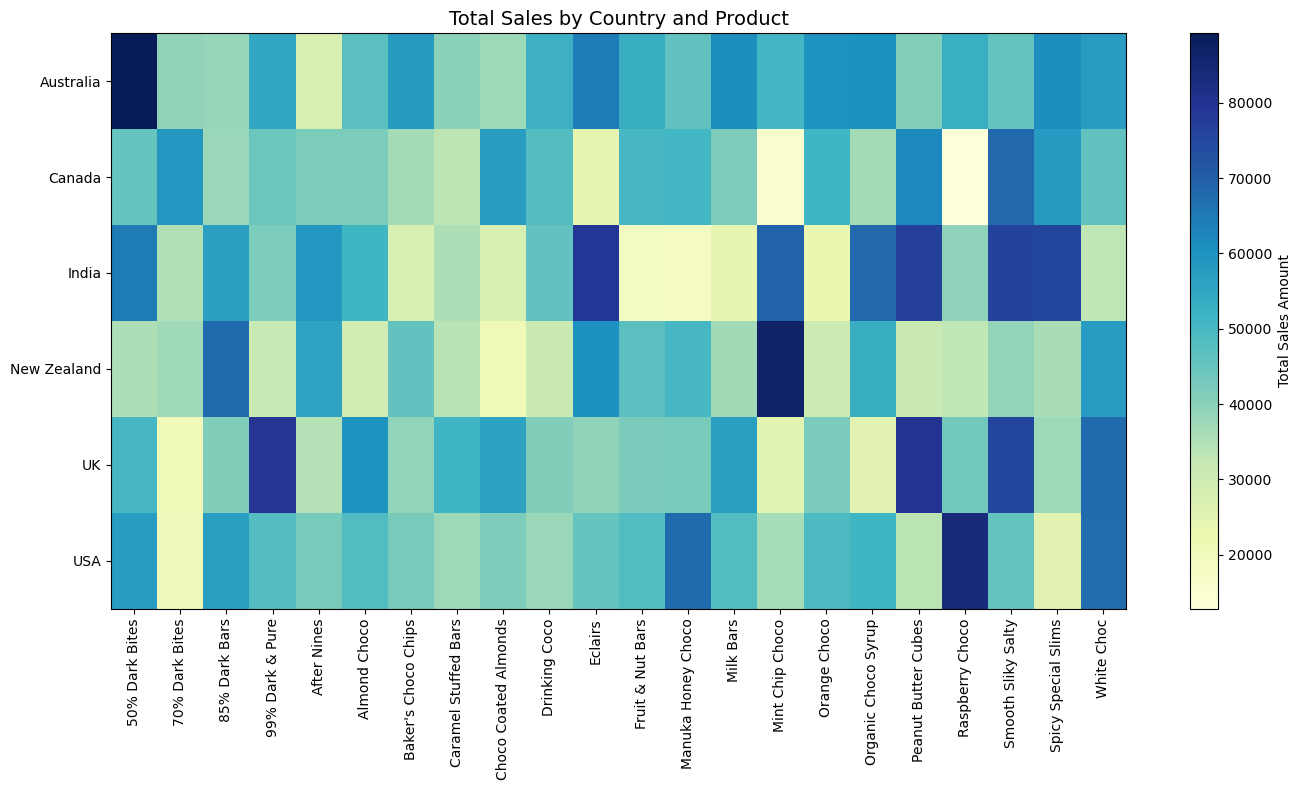

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("sales.csv", encoding = 'latin-1')

# Remove any non-numeric characters (like commas, $, £)
df["Amount"] = df["Amount"].replace(r"[^\d.]", "", regex=True).astype(float)

# Create pivot table
pivot_table = pd.pivot_table(
    df,
    values="Amount",
    index="Country",
    columns="Product",
    aggfunc="sum",
    fill_value=0
)
# optional, to see the pivot table in console
print(pivot_table)  

# Step 3: Plot heatmap using numpy + matplotlib
plt.figure(figsize=(14, 8))

# Convert pivot table to numpy array
data = pivot_table.values

# Show the heatmap
plt.imshow(data, cmap="YlGnBu", aspect="auto")

# Add colorbar
plt.colorbar(label="Total Sales Amount")

# Set ticks and labels
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns, rotation=90)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)

# Add title
plt.title("Total Sales by Country and Product", fontsize=14)

plt.tight_layout()
plt.show()

In [192]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot 

# Load the file 
df = pd.read_csv("sales.csv", encoding = 'latin-1')

# Remove any non-numeric characters (like commas, $, £)
df["Amount"] = df["Amount"].replace(r"[^\d.]", "", regex=True).astype(float)

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Extract month name from Date
df["Month"] = df["Date"].dt.month_name()

# Group by Product and Month
monthly_sales = df.groupby(["Product", "Month"])["Amount"].sum().reset_index()

# Pivot for better visualization
pivot_seasonality = monthly_sales.pivot(index="Month",  columns="Product",  values="Amount").fillna(0)

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
print(pivot_seasonality.head())

Product   50% Dark Bites  70% Dark Bites  85% Dark Bars  99% Dark & Pure  \
Month                                                                      
April            47789.0         31920.0        36414.0           7483.0   
August           49630.0          2177.0        97209.0          44800.0   
February         31752.0         45815.0        35763.0          22428.0   
January          55818.0         48097.0          273.0          71883.0   
July             48118.0         11998.0        24465.0          46697.0   

Product   After Nines  Almond Choco  Baker's Choco Chips  \
Month                                                      
April         52437.0       26320.0              37737.0   
August        40327.0       32571.0              58947.0   
February       5250.0       28308.0              21035.0   
January       55510.0       34461.0              60830.0   
July          23072.0       46858.0               5978.0   

Product   Caramel Stuffed Bars  Choco Coated A

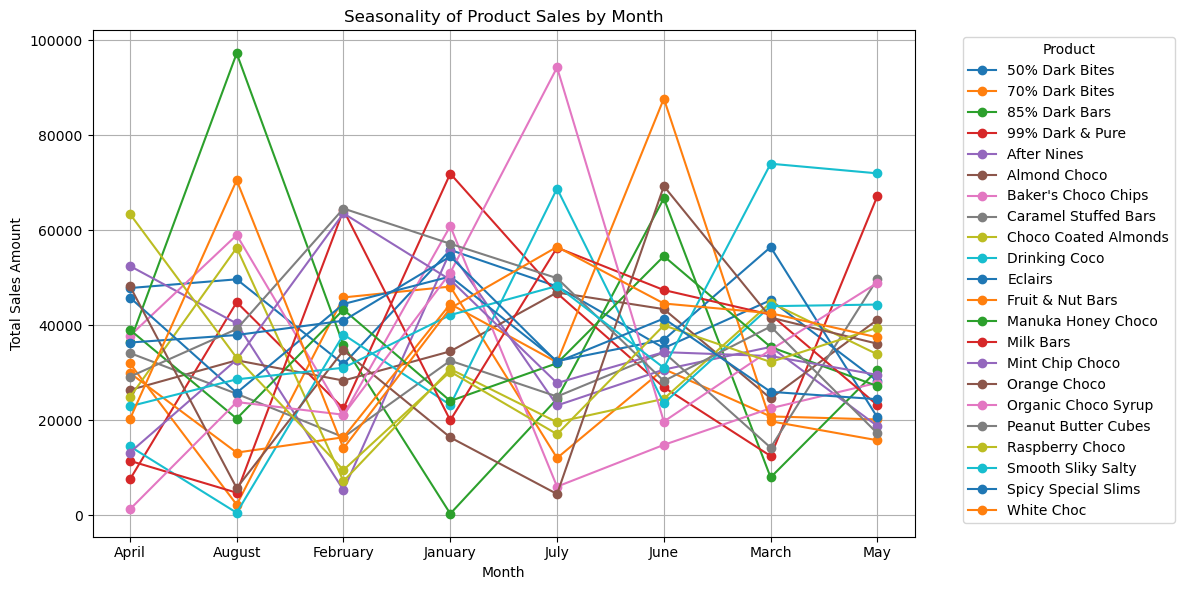

In [188]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot 

# Load the file 
df = pd.read_csv("sales.csv", encoding = 'latin-1')

# Remove any non-numeric characters (like commas, $, £)
df["Amount"] = df["Amount"].replace(r"[^\d.]", "", regex=True).astype(float)

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Extract month name from Date
df["Month"] = df["Date"].dt.month_name()

# Group by Product and Month
monthly_sales = df.groupby(["Product", "Month"])["Amount"].sum().reset_index()

# Pivot for better visualization
pivot_seasonality = monthly_sales.pivot(index="Month",  columns="Product",  values="Amount").fillna(0)

# Plot
plt.figure(figsize=(12, 6))
for product in pivot_seasonality.columns:
    plt.plot(pivot_seasonality.index, pivot_seasonality[product], marker ="o", label=product)

plt.title("Seasonality of Product Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation Matrix:
                 Amount  Boxes Shipped
Amount         1.000000      -0.018827
Boxes Shipped -0.018827       1.000000


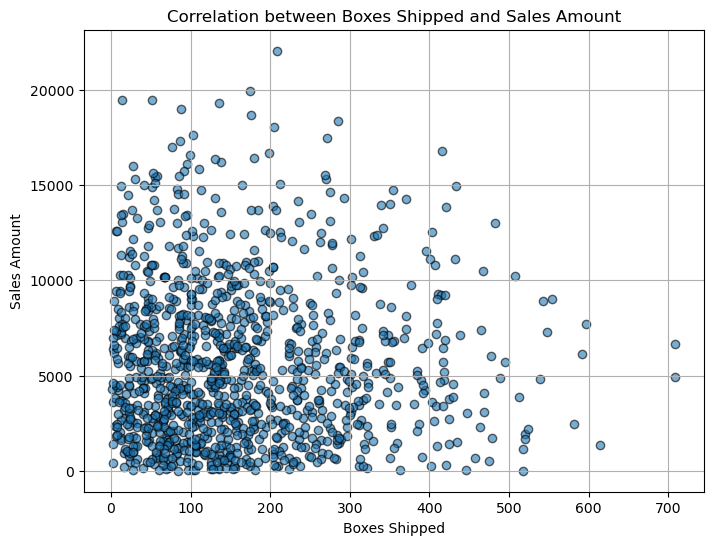

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("sales.csv", encoding="latin-1")

# Clean Amount column (remove symbols, convert to float) ---
df["Amount"] = df["Amount"].replace(r"[^\d.]", "", regex=True).astype(float)

# Ensure Boxes Shipped is numeric 
df["Boxes Shipped"] = pd.to_numeric(df["Boxes Shipped"], errors="coerce")

# Correlation Matrix
correlation = df[["Amount", "Boxes Shipped"]].corr()
print("Correlation Matrix:")
print(correlation)

# Step 2: Scatter Plot 
plt.figure(figsize=(8, 6))
plt.scatter(df["Boxes Shipped"], df["Amount"], alpha=0.6, edgecolors="k")
plt.title("Correlation between Boxes Shipped and Sales Amount")
plt.xlabel("Boxes Shipped")
plt.ylabel("Sales Amount")
plt.grid(True)
plt.show()

Correlation Matrix:
                 Amount  Boxes Shipped
Amount         1.000000      -0.018827
Boxes Shipped -0.018827       1.000000


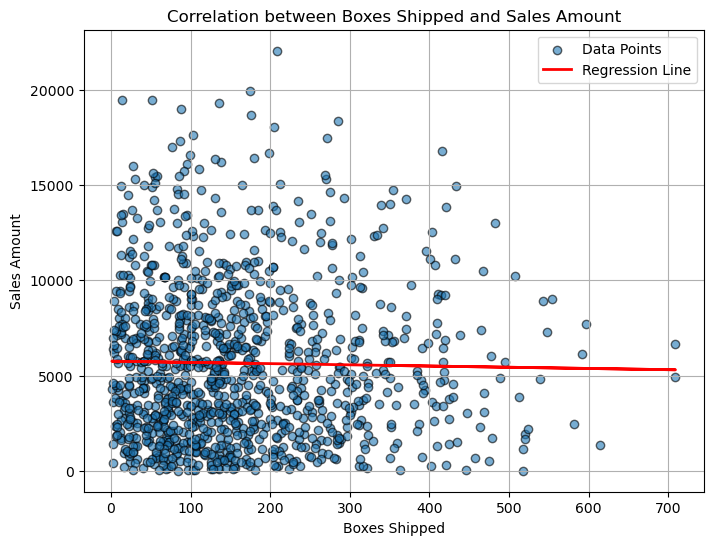

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("sales.csv", encoding="latin-1")

# Clean Amount column
df["Amount"] = df["Amount"].replace(r"[^\d.]", "", regex=True).astype(float)

# Ensure Boxes Shipped is numeric
df["Boxes Shipped"] = pd.to_numeric(df["Boxes Shipped"], errors="coerce")

# Correlation Matrix
correlation = df[["Amount", "Boxes Shipped"]].corr()
print("Correlation Matrix:")
print(correlation)

# Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(df["Boxes Shipped"], df["Amount"], alpha=0.6, edgecolors="k", label="Data Points")

# Fit regression line (y = m*x + b)
m, b = np.polyfit(df["Boxes Shipped"], df["Amount"], 1)
plt.plot(df["Boxes Shipped"], m*df["Boxes Shipped"] + b, color="red", linewidth=2, label="Regression Line")

plt.title("Correlation between Boxes Shipped and Sales Amount")
plt.xlabel("Boxes Shipped")
plt.ylabel("Sales Amount")
plt.legend()
plt.grid(True)
plt.show()


In [211]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("sales.csv", encoding="latin-1")

# Clean Amount column
df["Amount"] = df["Amount"].replace(r"[^\d.]", "", regex=True).astype(float) 

# Group by Country and Salesperson, sum the sales
sales_by_person = df.groupby(["Country", "Sales Person"])["Amount"].sum().reset_index()

# Rank salespeople within each country
sales_by_person["Rank"] = sales_by_person.groupby("Country")["Amount"].rank(method="first", ascending=False)

# Get top 3 salespeople per country
top3_salespeople = sales_by_person[sales_by_person["Rank"] <= 3].sort_values(["Country", "Rank"])

print(top3_salespeople)

         Country         Sales Person   Amount  Rank
18     Australia       Mallorie Waber  71134.0   1.0
7      Australia  Dennison Crosswaite  65275.0   2.0
3      Australia          Brien Boise  60417.0   3.0
27        Canada       Beverie Moffet  71995.0   1.0
28        Canada          Brien Boise  60375.0   2.0
41        Canada        Kelci Walkden  57078.0   3.0
55         India         Ches Bonnell  98763.0   1.0
73         India          Van Tuxwell  85785.0   2.0
70         India           Oby Sorrel  75579.0   3.0
92   New Zealand      Madelene Upcott  67550.0   1.0
76   New Zealand         Barr Faughny  61145.0   2.0
94   New Zealand       Marney O'Breen  58212.0   3.0
117           UK      Madelene Upcott  71330.0   1.0
113           UK       Jehu Rudeforth  69895.0   2.0
120           UK           Oby Sorrel  69279.0   3.0
132          USA  Dennison Crosswaite  69545.0   1.0
141          USA        Kelci Walkden  69356.0   2.0
140          USA     Karlen McCaffrey  61628.0

Forecast for next month (Moving Average): 803905.6666666666


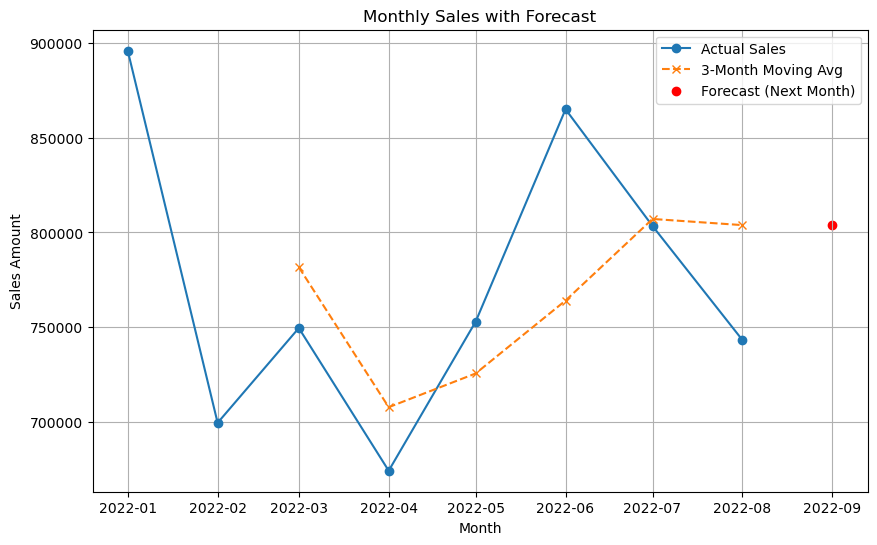

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Clean Amount column
df["Amount"] = df["Amount"].replace(r"[^\d.]", "", regex=True).astype(float)

# Aggregate sales by month
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum().reset_index()
monthly_sales["Date"] = monthly_sales["Date"].dt.to_timestamp()

# Calculate 3-month moving average
monthly_sales["3_MA"] = monthly_sales["Amount"].rolling(window=3).mean()

# Forecast next month = last available 3-month average
forecast_next = monthly_sales["3_MA"].iloc[-1]
print("Forecast for next month (Moving Average):", forecast_next)

# plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales["Date"], monthly_sales["Amount"], marker="o", label="Actual Sales")
plt.plot(monthly_sales["Date"], monthly_sales["3_MA"], marker="x", linestyle="--", label="3-Month Moving Avg")

# Extend forecast
next_month = monthly_sales["Date"].iloc[-1] + pd.DateOffset(months=1)
plt.scatter(next_month, forecast_next, color="red", label="Forecast (Next Month)")

plt.title("Monthly Sales with Forecast")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.legend()
plt.grid(True)
plt.show()